In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. LOAD & CLEAN DATA
# ==========================================
# Load the dataset (Make sure to upload 'student_feedback.csv' to Colab first)
df = pd.read_csv('student_feedback.csv')

# Drop columns that aren't useful for analysis (IDs)
# 'Unnamed: 0' and 'Student ID' are just identifiers
clean_df = df.drop(columns=['Unnamed: 0', 'Student ID'])

print("--- DATA OVERVIEW ---")
print(f"Total Responses: {len(clean_df)}")
print("Rating Scale seems to be: 1 to 10") # Based on the data preview (values like 9, 10 exist)
print("-" * 30)

# Check for missing values
print(clean_df.isnull().sum())

--- DATA OVERVIEW ---
Total Responses: 1001
Rating Scale seems to be: 1 to 10
------------------------------
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [17]:
# Calculate the Average Rating for each Question
avg_scores = clean_df.mean().sort_values(ascending=False)
print("\n--- AVERAGE SCORES (Ranked High to Low) ---")
print(avg_scores)


--- AVERAGE SCORES (Ranked High to Low) ---
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


In [18]:
plt.style.use('ggplot')

/tmp/ipython-input-3197281441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='viridis')


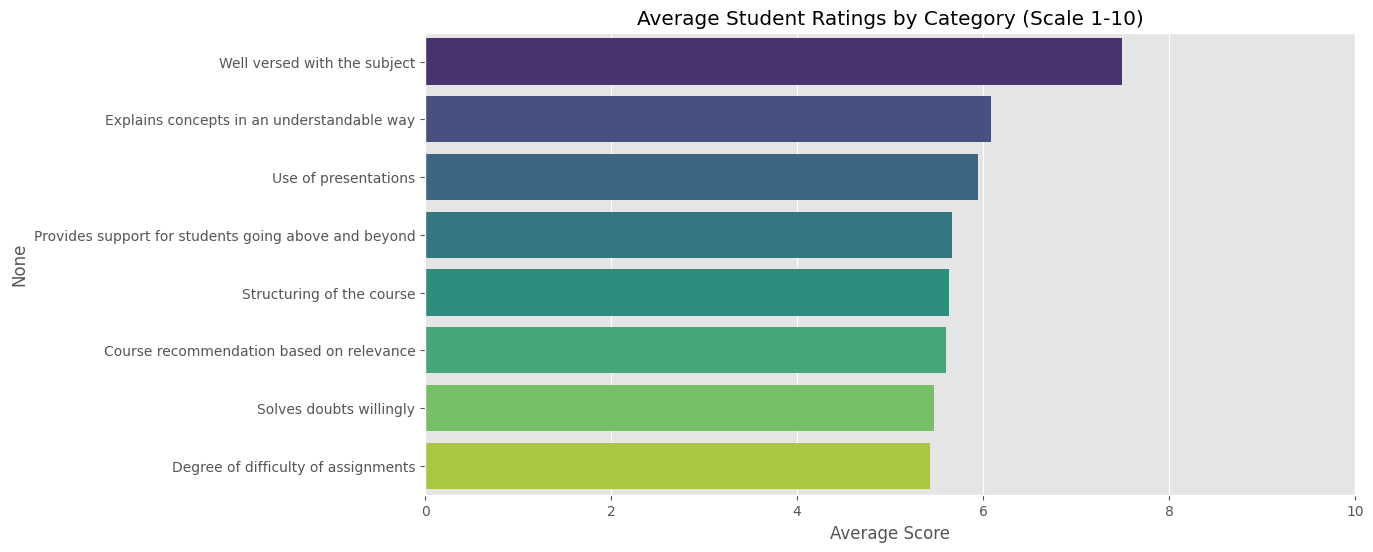

In [19]:
plt.figure(figsize=(12, 6))
# We perform a horizontal bar plot because the question text is long
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='viridis')
plt.title('Average Student Ratings by Category (Scale 1-10)')
plt.xlabel('Average Score')
plt.xlim(0, 10) # Set limit to max rating
plt.show()

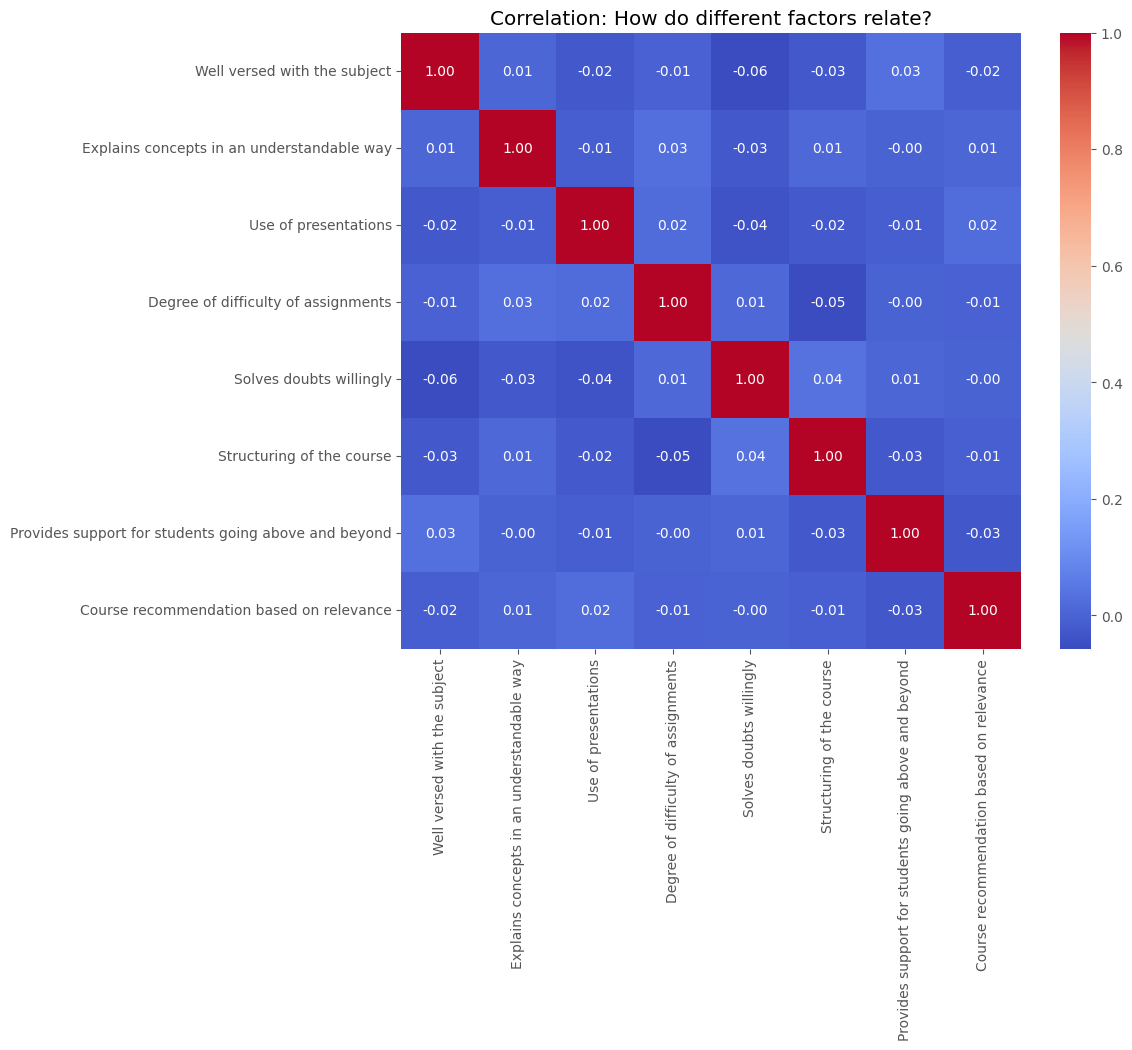

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: How do different factors relate?')
plt.show()

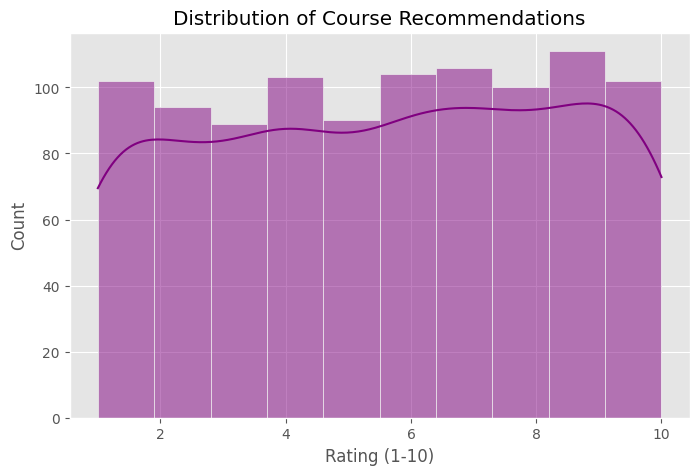

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_df['Course recommendation based on relevance'], bins=10, kde=True, color='purple')
plt.title('Distribution of Course Recommendations')
plt.xlabel('Rating (1-10)')
plt.show()

In [22]:
print("\n--- KEY INSIGHTS ---")

best_category = avg_scores.idxmax()
best_score = avg_scores.max()
worst_category = avg_scores.idxmin()
worst_score = avg_scores.min()

print(f"✅ STRENGTH: The course excels in '{best_category}' with a score of {best_score:.2f}/10.")
print(f"⚠️ IMPROVEMENT AREA: Students are least satisfied with '{worst_category}' (Score: {worst_score:.2f}/10).")


--- KEY INSIGHTS ---
✅ STRENGTH: The course excels in 'Well versed with the subject' with a score of 7.50/10.
⚠️ IMPROVEMENT AREA: Students are least satisfied with 'Degree of difficulty of assignments' (Score: 5.43/10).


In [23]:
corr_val = clean_df['Explains concepts in an understandable way'].corr(clean_df['Course recommendation based on relevance'])
print(f"ℹ️  IMPACT: The correlation between 'Explaining Concepts' and 'Course Recommendation' is {corr_val:.2f}.")
if corr_val > 0.5:
    print("   -> This suggests that better explanations strongly lead to better course ratings.")

ℹ️  IMPACT: The correlation between 'Explaining Concepts' and 'Course Recommendation' is 0.01.
